In [1]:
print(":3!\n")

:3!



In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
from scipy.fftpack import fft, ifft
from scipy.signal import fftconvolve

In [4]:
#seq_depths = np.random.rand(1,2000)*10

seq_csv = pd.read_csv("data/Sample_histogram_STSV1PGR_20000_to_40000",sep="\t",names=["gen","time","signal"])
seq_csv
seq_depths = seq_csv['signal'].to_numpy()

In [136]:
win = 20000
win_avg = np.ones( (1,win) )/win
win_avg = win_avg[0, :]
win_avg

array([5.e-05, 5.e-05, 5.e-05, ..., 5.e-05, 5.e-05, 5.e-05])

In [137]:
convl = np.convolve(seq_depths,win_avg,'same')

In [138]:
seq_pd = pd.DataFrame(seq_depths,columns=['term-seq depth'])
seq_pd['Moving average convolved'] = convl.tolist()
seq_pd

,term-seq depth,Moving average convolved
0,20,28.92775
1,21,28.92920
2,22,28.93065
3,23,28.93210
4,24,28.93365
...,...,...
19995,5,11.03280
19996,4,11.03145
19997,4,11.03010
19998,4,11.02875


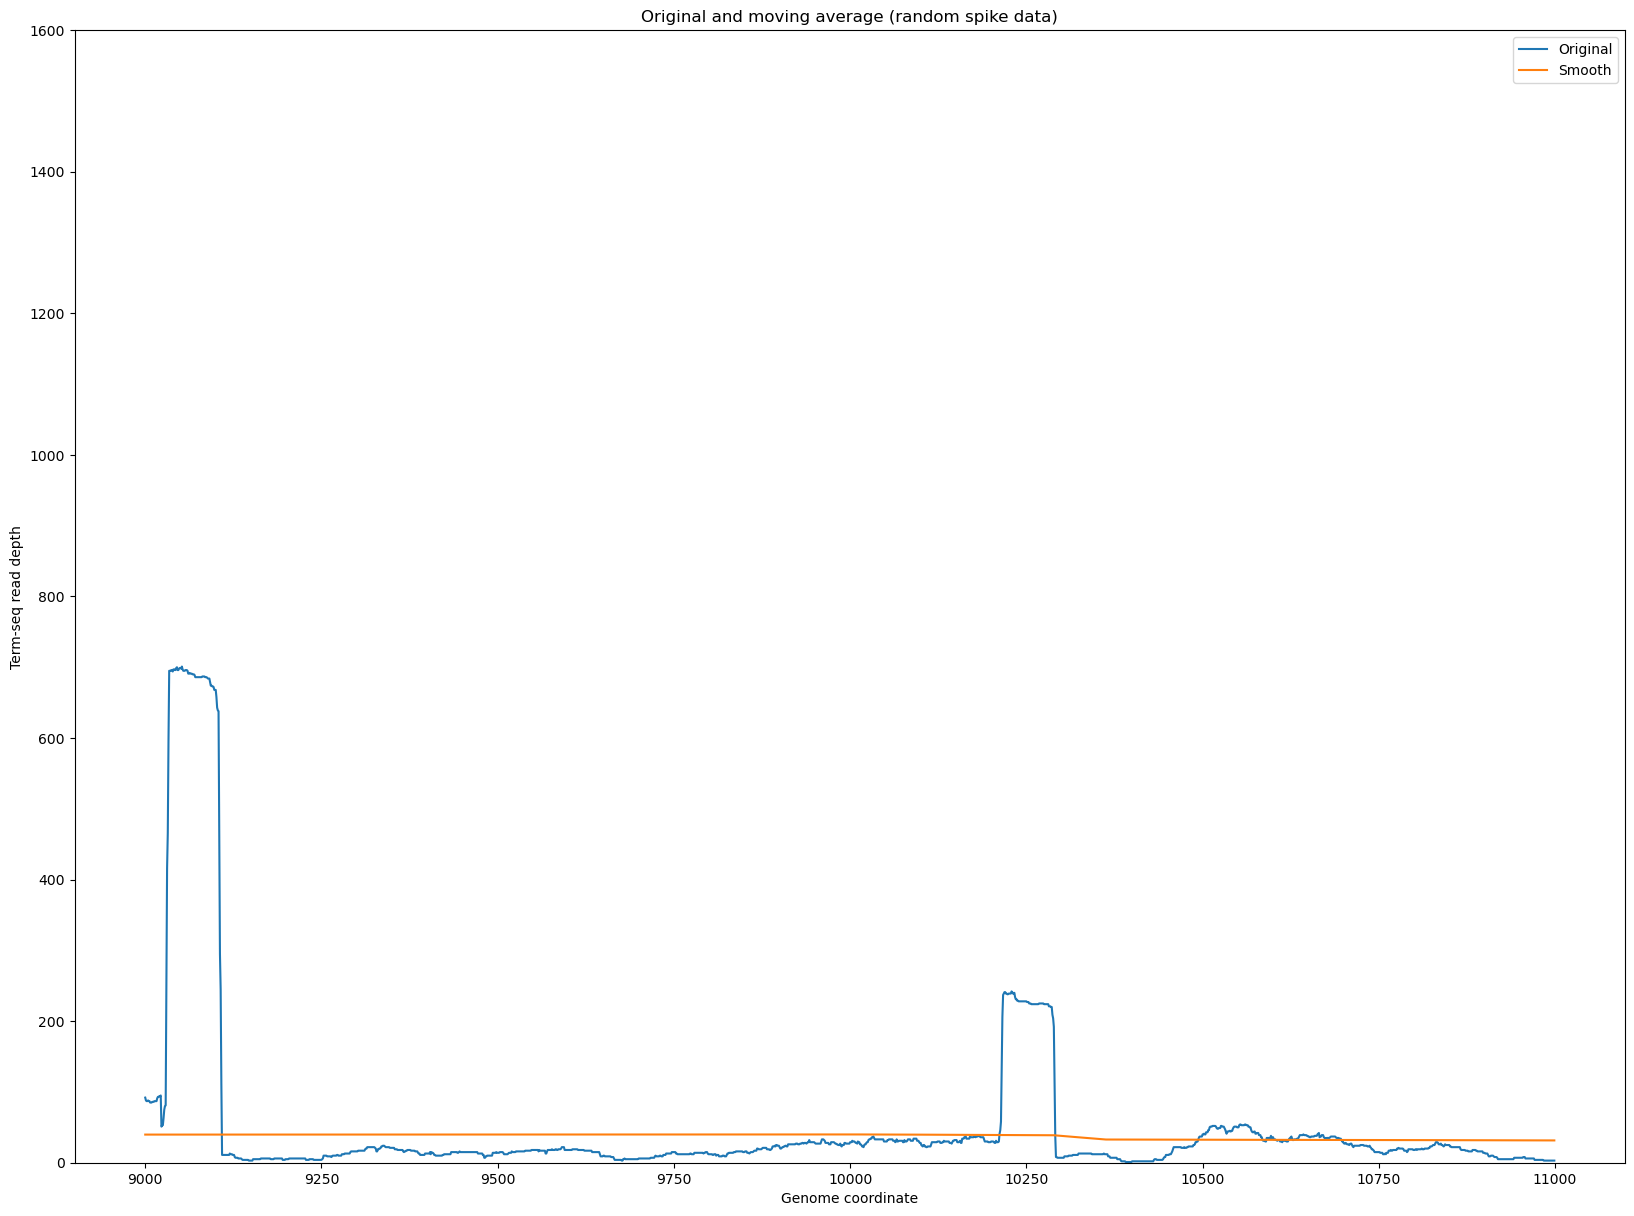

In [139]:
plt.close()
fig = plt.figure(figsize=(20,15),dpi=100)
ax = fig.add_subplot() 

#ax.text(700,800,r'Moving average convolution with window size = 4000',fontsize=26)
plt.ylabel('Term-seq read depth')
plt.xlabel('Genome coordinate')
plt.title('Original and moving average (random spike data)')
plt.plot(seq_pd[9000:11000])
plt.legend(('Original','Smooth'))
plt.ylim(0,1600)
plt.show()

In [140]:
my_avg_convl = fftconvolve(in1=seq_depths,in2=win_avg,mode="same")
my_avg_sqrd = np.square(my_avg_convl)
my_seq_sqrd = np.square(seq_depths)

 

In [10]:
print(my_avg_convl.size)
print(my_avg_sqrd.size)
print(my_seq_sqrd.size)
print(my_seq_sqr_convl.size)

20000
20000
20000


NameError: name 'my_seq_sqr_convl' is not defined

In [141]:
my_seq_sqr_convl = fftconvolve(in1=my_seq_sqrd,in2=win_avg,mode="same")

[20 21 22 ...  4  4  4]


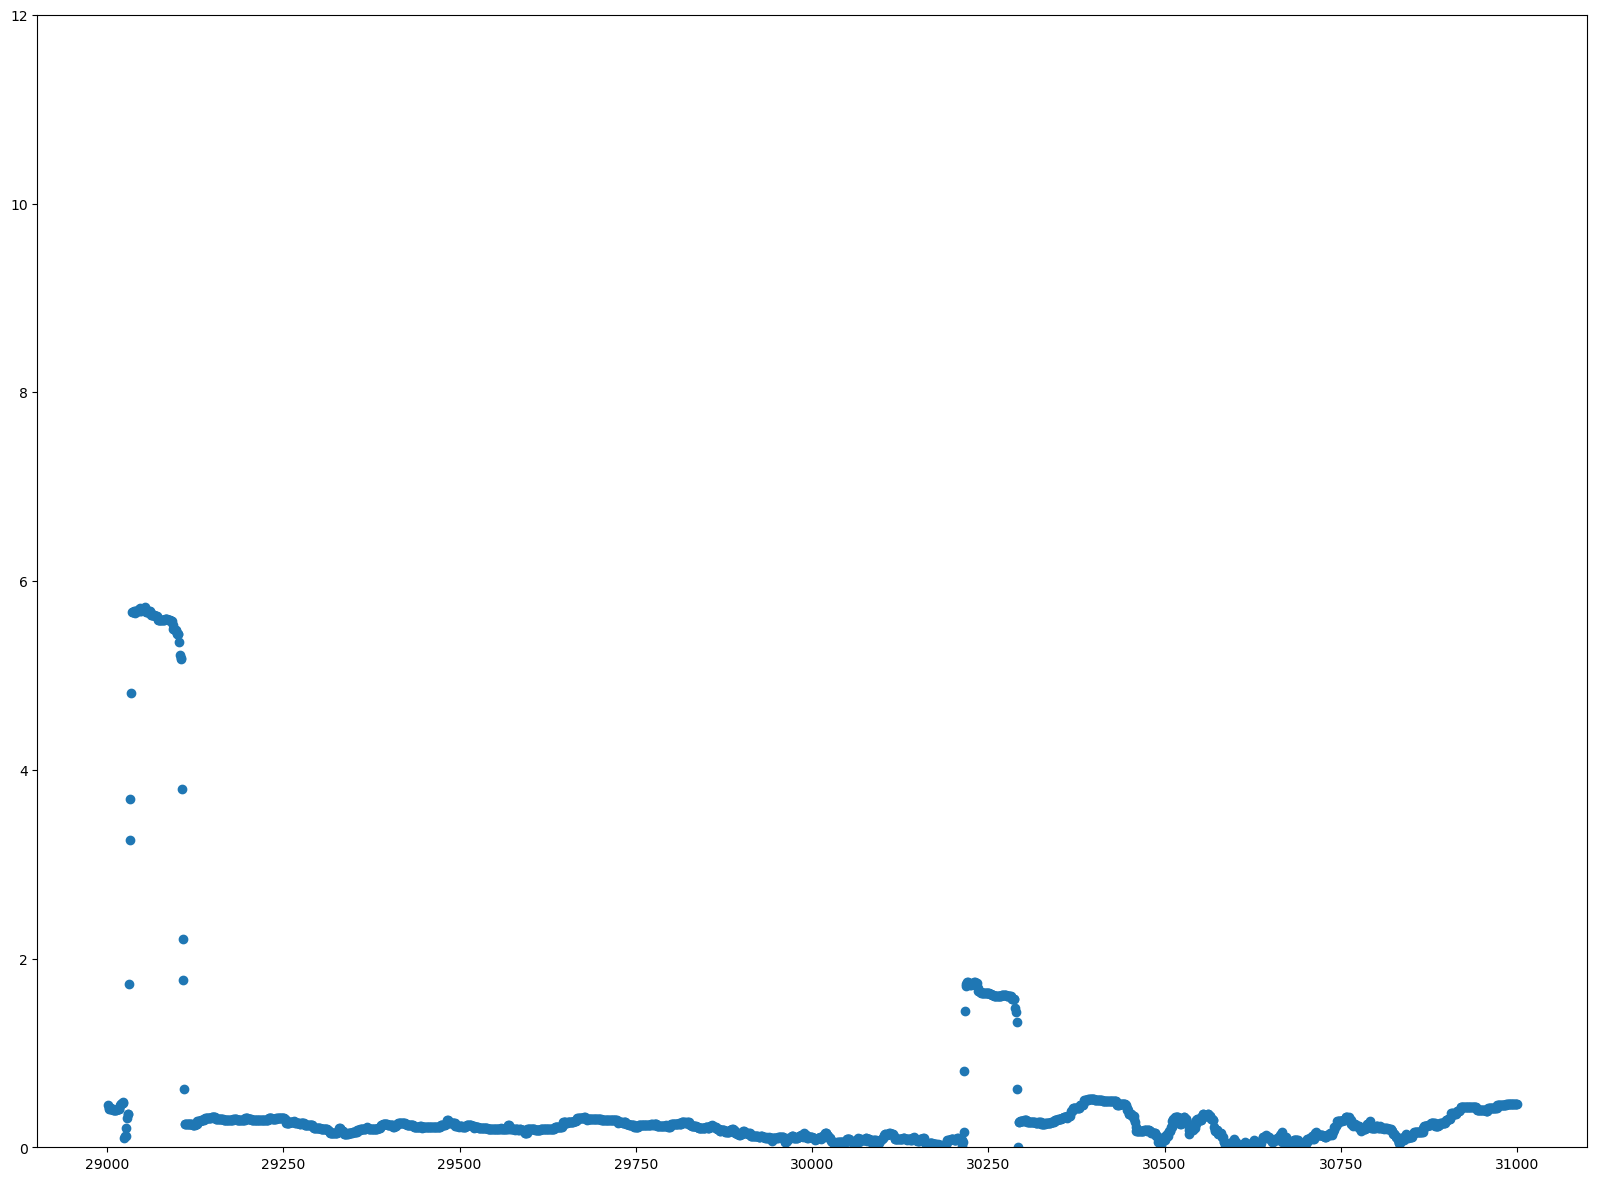

In [142]:
my_stdev = np.sqrt( abs( my_seq_sqr_convl - my_avg_sqrd) ) 
z_score = abs( (my_avg_convl - seq_depths)/(0.0000000000000001+my_stdev) )
print(seq_depths)
# plt.plot(my_stdev)
pd_stdev = pd.DataFrame(my_stdev,columns=["SD from scipy.fftconvolve"])
pd_stdev["time"]=seq_csv["time"]
pd_stdev["Z-score"]=pd.DataFrame(z_score,columns=["Z-score"])

sd_fig = plt.figure(figsize=(20,15),dpi=100)
plt.ylim(0,12)
plt.scatter(x=pd_stdev["time"][9000:11000],y=pd_stdev["Z-score"][9000:11000])


In [143]:
win

20000

In [154]:
seq_csv["time"]

0        20001
1        20002
2        20003
3        20004
4        20005
         ...  
19995    39996
19996    39997
19997    39998
19998    39999
19999    40000
Name: time, Length: 20000, dtype: int64

In [217]:
pd.DataFrame(z_score,columns=["Z-score"])

,Z-score
0,0.000048
1,0.000050
2,0.000052
3,0.000054
4,0.000056
...,...
19995,0.318647
19996,0.234974
19997,0.236187
19998,0.237412


In [47]:
win

4000